In [48]:
# Machine Learning 
# HW1
# Shanle Yao
# 800962310
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import warnings
from matplotlib.colors import ListedColormap

## Q1

In [49]:
df = pd.read_csv('diabetes.csv')
X = df.loc[:, 'Pregnancies':'Age'] 
Y = df.loc[:, 'Outcome'] 

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [51]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)

In [52]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)

In [53]:
print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred))
print("Precision:",metrics.precision_score(Y_test,Y_pred))
print("Recall:",metrics.recall_score(Y_test,Y_pred))

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447


Text(0.5, 257.44, 'Predicted label')

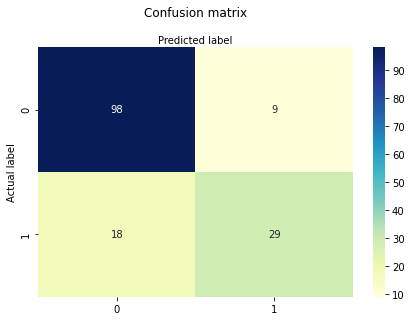

In [54]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Q1 Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

## Q2

In [57]:
#Naive Bays
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB() 
classifier.fit(X_train, Y_train) 
Y2_pred  =  classifier.predict(X_test) 

In [59]:
from sklearn.metrics import confusion_matrix,accuracy_score 
print("Accuracy:",metrics.accuracy_score(Y_test,Y2_pred))
print("Precision:",metrics.precision_score(Y_test,Y2_pred))
print("Recall:",metrics.recall_score(Y_test,Y2_pred))

Accuracy: 0.7922077922077922
Precision: 0.6744186046511628
Recall: 0.6170212765957447


Text(0.5, 257.44, 'Predicted label')

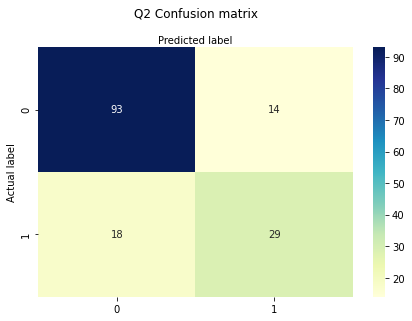

In [60]:
cnf_matrix = confusion_matrix(Y_test, Y2_pred)
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Q2 Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

## Q3

In [80]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)
predicted_y = []
expected_y = []

for train_index, test_index in kf.split(X):
    X3_train, X3_test = X.iloc[train_index], X.iloc[test_index]
    Y3_train, Y3_test = Y.iloc[train_index], Y.iloc[test_index]
    
    X3_train = sc_X.fit_transform(X3_train)
    X3_test = sc_X.transform(X3_test)

    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X3_train,Y3_train)
    Y3_pred = classifier.predict(X3_test)
    
    predicted_y.extend(Y3_pred)
    expected_y.extend(Y3_test)
    
    cnf_matrix = confusion_matrix(expected_y,predicted_y)
    print(cnf_matrix)
    print("Accuracy:",metrics.accuracy_score(expected_y,predicted_y))
    print("Precision:",metrics.precision_score(expected_y,predicted_y))
    print("Recall:",metrics.recall_score(expected_y,predicted_y))
    print()

[[87 13]
 [22 32]]
Accuracy: 0.7727272727272727
Precision: 0.7111111111111111
Recall: 0.5925925925925926

[[163  27]
 [ 50  68]]
Accuracy: 0.75
Precision: 0.7157894736842105
Recall: 0.576271186440678

[[249  38]
 [ 76  99]]
Accuracy: 0.7532467532467533
Precision: 0.7226277372262774
Recall: 0.5657142857142857

[[351  50]
 [ 90 124]]
Accuracy: 0.7723577235772358
Precision: 0.7126436781609196
Recall: 0.5794392523364486

[[440  60]
 [115 153]]
Accuracy: 0.7721354166666666
Precision: 0.7183098591549296
Recall: 0.5708955223880597



In [81]:
kf = KFold(n_splits = 10)
predicted_y = []
expected_y = []

for train_index, test_index in kf.split(X):
    X3_train, X3_test = X.iloc[train_index], X.iloc[test_index]
    Y3_train, Y3_test = Y.iloc[train_index], Y.iloc[test_index]
    
    X3_train = sc_X.fit_transform(X3_train)
    X3_test = sc_X.transform(X3_test)

    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X3_train,Y3_train)
    Y3_pred = classifier.predict(X3_test)
    
    predicted_y.extend(Y3_pred)
    expected_y.extend(Y3_test)
    
    cnf_matrix = confusion_matrix(expected_y,predicted_y)
    print(cnf_matrix)
    print("Accuracy:",metrics.accuracy_score(expected_y,predicted_y))
    print("Precision:",metrics.precision_score(expected_y,predicted_y))
    print("Recall:",metrics.recall_score(expected_y,predicted_y))
    print()

[[35 10]
 [14 18]]
Accuracy: 0.6883116883116883
Precision: 0.6428571428571429
Recall: 0.5625

[[86 14]
 [23 31]]
Accuracy: 0.7597402597402597
Precision: 0.6888888888888889
Recall: 0.5740740740740741

[[124  19]
 [ 36  52]]
Accuracy: 0.7619047619047619
Precision: 0.7323943661971831
Recall: 0.5909090909090909

[[162  28]
 [ 50  68]]
Accuracy: 0.7467532467532467
Precision: 0.7083333333333334
Recall: 0.576271186440678

[[207  33]
 [ 62  83]]
Accuracy: 0.7532467532467533
Precision: 0.7155172413793104
Recall: 0.5724137931034483

[[251  36]
 [ 75 100]]
Accuracy: 0.7597402597402597
Precision: 0.7352941176470589
Recall: 0.5714285714285714

[[307  43]
 [ 80 109]]
Accuracy: 0.7717996289424861
Precision: 0.7171052631578947
Recall: 0.5767195767195767

[[355  47]
 [ 89 125]]
Accuracy: 0.7792207792207793
Precision: 0.7267441860465116
Recall: 0.5841121495327103

[[400  54]
 [100 138]]
Accuracy: 0.7774566473988439
Precision: 0.71875
Recall: 0.5798319327731093

[[443  57]
 [112 156]]
Accuracy: 0.7799479

## Q4

In [82]:
kf = KFold(n_splits = 5)
predicted_y = []
expected_y = []

for train_index, test_index in kf.split(X):
    X3_train, X3_test = X.iloc[train_index], X.iloc[test_index]
    Y3_train, Y3_test = Y.iloc[train_index], Y.iloc[test_index]
    
    X3_train = sc_X.fit_transform(X3_train)
    X3_test = sc_X.transform(X3_test)

    classifier = GaussianNB()
    classifier.fit(X3_train,Y3_train)
    Y3_pred = classifier.predict(X3_test)
    
    predicted_y.extend(Y3_pred)
    expected_y.extend(Y3_test)
    
    cnf_matrix = confusion_matrix(expected_y,predicted_y)
    print(cnf_matrix)
    print("Accuracy:",metrics.accuracy_score(expected_y,predicted_y))
    print("Precision:",metrics.precision_score(expected_y,predicted_y))
    print("Recall:",metrics.recall_score(expected_y,predicted_y))
    print()

[[84 16]
 [22 32]]
Accuracy: 0.7532467532467533
Precision: 0.6666666666666666
Recall: 0.5925925925925926

[[158  32]
 [ 50  68]]
Accuracy: 0.7337662337662337
Precision: 0.68
Recall: 0.576271186440678

[[240  47]
 [ 74 101]]
Accuracy: 0.7380952380952381
Precision: 0.6824324324324325
Recall: 0.5771428571428572

[[335  66]
 [ 85 129]]
Accuracy: 0.7544715447154472
Precision: 0.6615384615384615
Recall: 0.602803738317757

[[419  81]
 [109 159]]
Accuracy: 0.7526041666666666
Precision: 0.6625
Recall: 0.5932835820895522

